# Distribuições de probabilidade para variáveis discretas

## Bernoulli e Binomial

Para a **distribuição de Bernoulli**, os valores da variável podem assumir apenas dois resultados possíveis, sendo que tais resultados são chamados de sucesso ($x=1$) ou fracasso ($x=0$).

A distribuição de Bernoulli apresenta a probabilidade de sucesso quando ocorre *apenas um experimento*:

$$
P(x) = 
\begin{cases} 
1-p \quad & \text{ para } x= 0\\
p \quad & \text{ para } x=1
\end{cases}
$$

que também pode ser escrito como:

$$
P(X=x) = p^x \cdot (1-p)^{1-x}
$$

Ou seja, para um arremesso de moeda, $p=q=\frac{1}{2}$.

Suponha, para outro exemplo, que a probabilidade de um candidato passar em uma determinada prova após um curso de formação seja de 48 %. Se cada candidato só pode realizar o exame uma vez:

$$
P(X=1) = (0,48)^1 \cdot (1-0,48)^0 = 0,48
$$

$$
P(X=0) = (0,48)^0 \cdot (1-0,48)^1 = 0,52
$$

A distribuição de Bernoulli serve de base para distribuições mais elaboradas, como a distribuição binomial.

A **distribuição binomial** ocorre quando há $n$ repetições independentes do experimento de Bernoulli e a probabilidade de sucesso $p$ é constante em todas as repetições.

A variável no modelo binomial indica a quantidade de sucessos $k$ nas $n$ repetições do experimento:

$$
P(X=k) = \binom{n}{k} \cdot p^k \cdot (1-p)^{n-k}
$$

em que

$$\binom{n}{k} = \frac{n!}{k!(n-k)!}$$

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.binom.html

In [1]:
from scipy.stats import binom

moeda = binom.rvs(
    10,                # número de lançamentos
    0.5,               # probabilidade de sucesso (cara)
    size=1,            # número de repetições do experimento
    random_state=42,   # seed para aleatoriedade
)

moeda

array([4], dtype=int64)

In [2]:
import math

math.factorial(10) / (math.factorial(4) * math.factorial(10 - 4)) * 0.5**4 *(1 - 0.5)**(10 - 4)

0.205078125

[ 0  1  2  3  4  5  6  7  8  9 10]
[   99   959  4386 11803 20518 24543 20640 11710  4288   968    86]


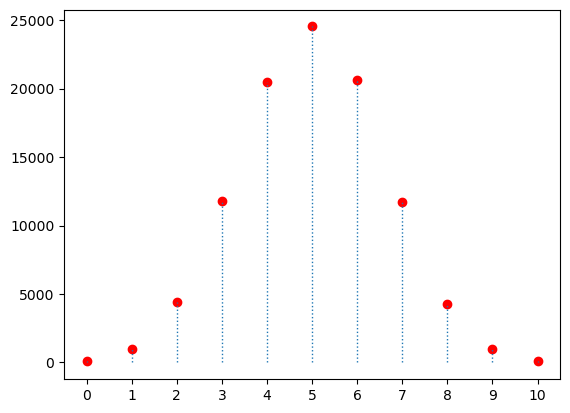

In [6]:
import matplotlib.pyplot as plt
import numpy as np

moeda_diversos = binom.rvs(
    10,                # número de lançamentos
    0.5,               # probabilidade de sucesso (cara)
    size=100_000,        # número de repetições do experimento
    random_state=42,   # seed para aleatoriedade
)

valores, contagem = np.unique(moeda_diversos, return_counts=True)

print(valores)
print(contagem)

plt.vlines(valores, 0, contagem, linewidth=1, linestyle="dotted")
plt.scatter(valores, contagem, marker="o", color="red")
plt.xticks(valores)

plt.show()

In [7]:
x = np.arange(0, 11)
y = binom.pmf(x, 10, 0.5)

print(*tuple(zip(x, y)), sep="\n")

(0, 0.0009765624999999989)
(1, 0.009765625000000002)
(2, 0.04394531250000004)
(3, 0.1171875)
(4, 0.2050781249999999)
(5, 0.24609375000000003)
(6, 0.2050781249999999)
(7, 0.11718749999999999)
(8, 0.04394531250000004)
(9, 0.009765625000000002)
(10, 0.0009765625)


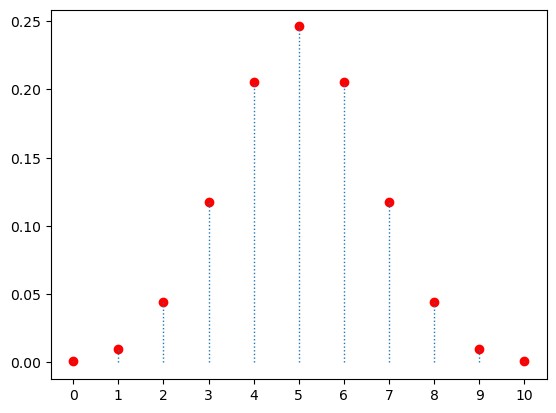

In [8]:
from graficos import plot_pmf_discretas

plot_pmf_discretas(x, y)

In [9]:
x = np.arange(0, 11)
y = binom.cdf(x, 10, 0.5)

print(*tuple(zip(x, y)), sep="\n")

(0, 0.0009765625)
(1, 0.0107421875)
(2, 0.0546875)
(3, 0.171875)
(4, 0.376953125)
(5, 0.623046875)
(6, 0.828125)
(7, 0.9453125)
(8, 0.9892578125)
(9, 0.9990234375)
(10, 1.0)


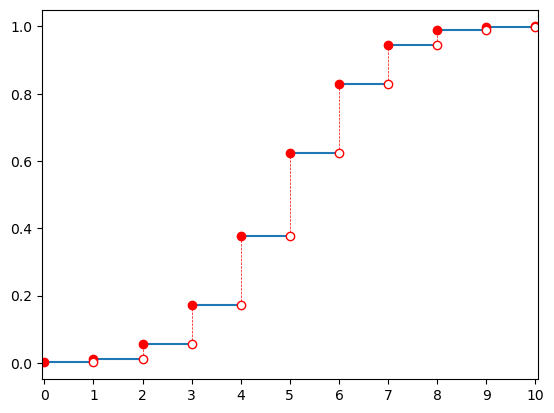

In [10]:
from graficos import plot_cdf_discretas

plot_cdf_discretas(x, y)

In [11]:
# P(x <=5) ou seja, probabilidade de sair 5 ou menos "cara" em 10 lançamentos
binom.cdf(5, 10, 0.5)

0.623046875

In [12]:
# ppf -> inverso da cdf
binom.ppf(0.3, 10, 0.5)

4.0

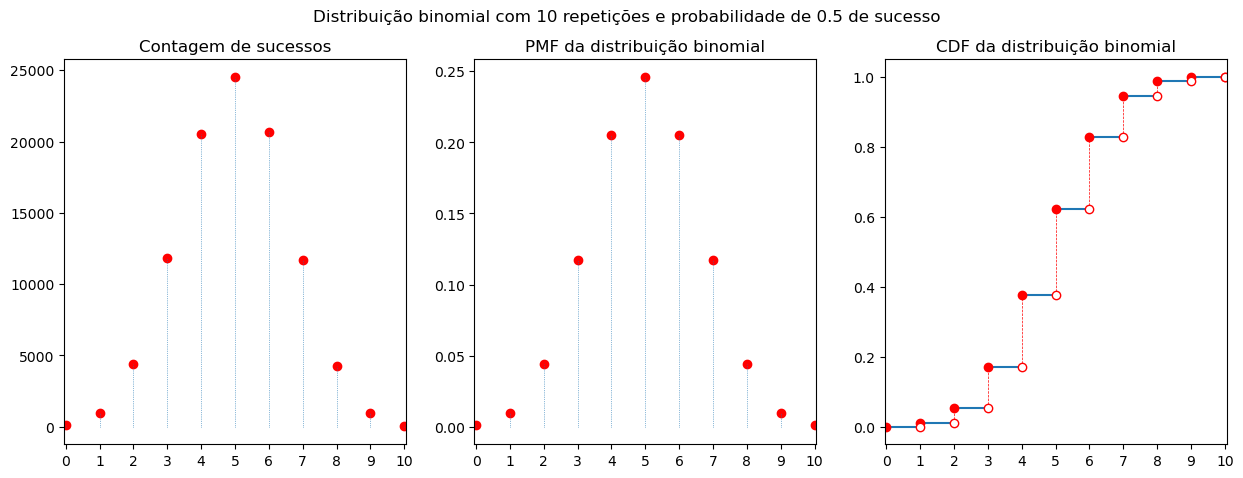

In [14]:
from graficos import plot_binomial

plot_binomial(
    n_repeticoes=10,
    probabilidade_sucesso=0.5,
    n_experimentos=100_000,
)

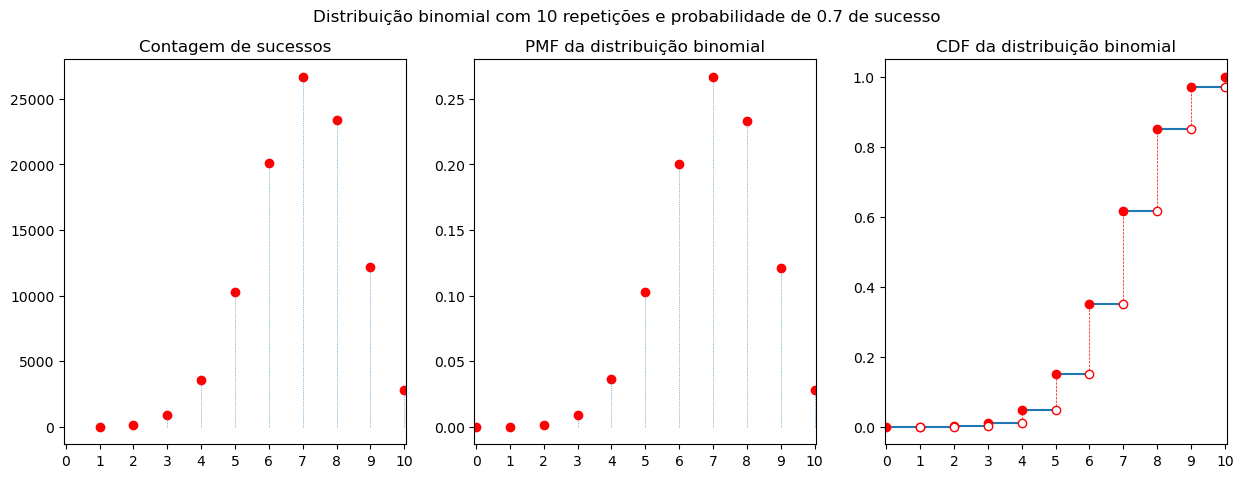

In [15]:
plot_binomial(
    n_repeticoes=10,
    probabilidade_sucesso=0.7,
    n_experimentos=100_000,
)